<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_2_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.839320,50.730664,39.093643,-4353.029522,-4173.365895,1533.955002,-5707.320896
1,0.0,1.0,79.651725,78.769825,29.533777,-1591.033446,-1393.078119,918.144927,-2311.223046
2,0.0,2.0,70.007736,61.939931,48.877230,-3376.965395,-3186.140497,468.439429,-3654.579926
3,0.0,3.0,20.516805,69.200002,31.065903,-106.481688,24.301022,-2643.245714,2667.546736
4,0.0,4.0,49.974453,50.497181,68.208452,4646.991397,4825.671482,-789.468833,5615.140316
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,82.950109,72.204398,61.316498,9033.140636,9259.611641,999.717040,8259.894601
29996,999.0,26.0,75.627538,25.941807,34.249865,-1160.740395,-1014.921186,229.898894,-1244.820080
29997,999.0,27.0,95.725855,37.113397,53.745533,-2694.533490,-2497.948705,719.550130,-3217.498835
29998,999.0,28.0,58.588244,87.495371,99.119320,-8052.541829,-7797.338894,1118.284306,-8915.623200


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    79.839320  50.730664  ...  1533.955002 -5707.320896
      1.0    79.651725  78.769825  ...   918.144927 -2311.223046
      2.0    70.007736  61.939931  ...   468.439429 -3654.579926
      3.0    20.516805  69.200002  ... -2643.245714  2667.546736
      4.0    49.974453  50.497181  ...  -789.468833  5615.140316
...                ...        ...  ...          ...          ...
999.0 25.0   82.950109  72.204398  ...   999.717040  8259.894601
      26.0   75.627538  25.941807  ...   229.898894 -1244.820080
      27.0   95.725855  37.113397  ...   719.550130 -3217.498835
      28.0   58.588244  87.495371  ...  1118.284306 -8915.623200
      29.0   62.495764  47.553659  ...   411.175007  1030.503827

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    79.839320  50.730664  ...  1533.955002 -5707.320896
      1.0    79.651725  78.769825  ...   918.144927 -2311.223046
      2.0    70.007736  61.939931  ...   468.439429 -3654.579926
      3.0    20.516805  69.200002  ... -2643.245714  2667.546736
      4.0    49.974453  50.497181  ...  -789.468833  5615.140316
...                ...        ...  ...          ...          ...
999.0 25.0   82.950109  72.204398  ...   999.717040  8259.894601
      26.0   75.627538  25.941807  ...   229.898894 -1244.820080
      27.0   95.725855  37.113397  ...   719.550130 -3217.498835
      28.0   58.588244  87.495371  ...  1118.284306 -8915.623200
      29.0   62.495764  47.553659  ...   411.175007  1030.503827

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.839320,50.730664,39.093643,-4353.029522,-4173.365895,1533.955002,-5707.320896
1,0.0,1.0,79.651725,78.769825,29.533777,-1591.033446,-1393.078119,918.144927,-2311.223046
2,0.0,2.0,70.007736,61.939931,48.877230,-3376.965395,-3186.140497,468.439429,-3654.579926
3,0.0,3.0,20.516805,69.200002,31.065903,-106.481688,24.301022,-2643.245714,2667.546736
4,0.0,4.0,49.974453,50.497181,68.208452,4646.991397,4825.671482,-789.468833,5615.140316
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,82.950109,72.204398,61.316498,9033.140636,9259.611641,999.717040,8259.894601
29996,999.0,26.0,75.627538,25.941807,34.249865,-1160.740395,-1014.921186,229.898894,-1244.820080
29997,999.0,27.0,95.725855,37.113397,53.745533,-2694.533490,-2497.948705,719.550130,-3217.498835
29998,999.0,28.0,58.588244,87.495371,99.119320,-8052.541829,-7797.338894,1118.284306,-8915.623200


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    79.839320  50.730664  ...  1533.955002 -5707.320896
      1.0    79.651725  78.769825  ...   918.144927 -2311.223046
      2.0    70.007736  61.939931  ...   468.439429 -3654.579926
      3.0    20.516805  69.200002  ... -2643.245714  2667.546736
      4.0    49.974453  50.497181  ...  -789.468833  5615.140316
...                ...        ...  ...          ...          ...
999.0 25.0   82.950109  72.204398  ...   999.717040  8259.894601
      26.0   75.627538  25.941807  ...   229.898894 -1244.820080
      27.0   95.725855  37.113397  ...   719.550130 -3217.498835
      28.0   58.588244  87.495371  ...  1118.284306 -8915.623200
      29.0   62.495764  47.553659  ...   411.175007  1030.503827

[30000 rows x 7 columns]

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

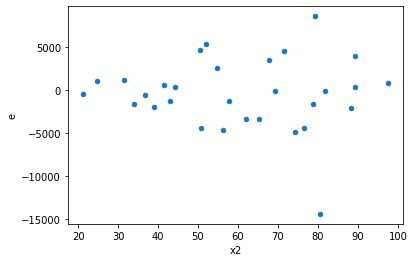

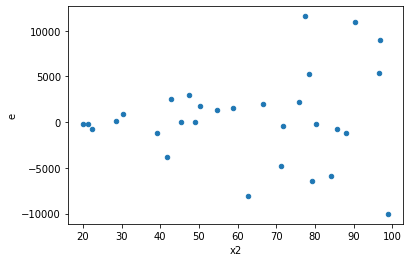

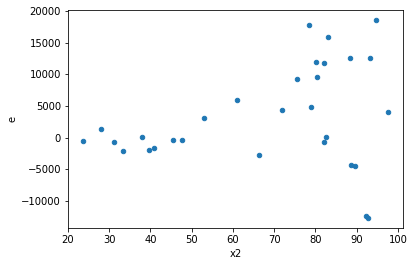

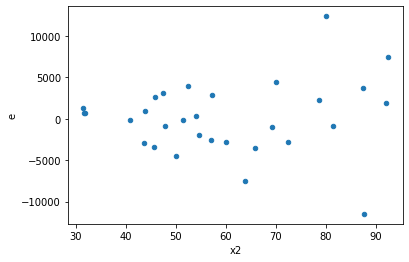

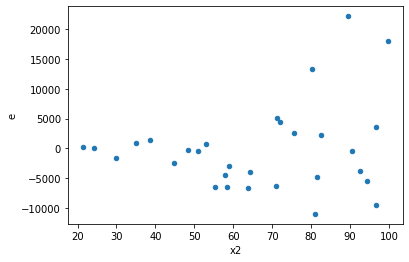

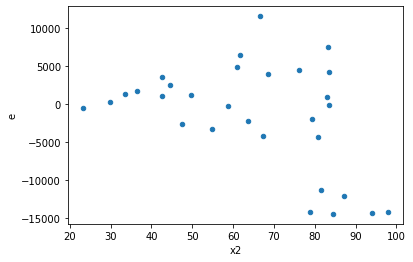

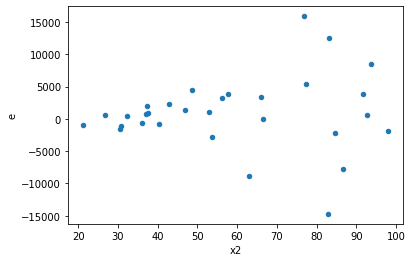

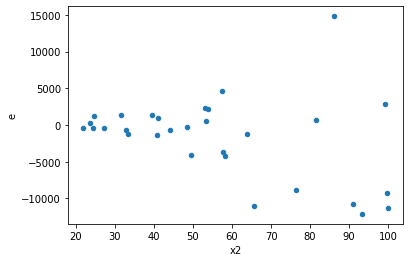

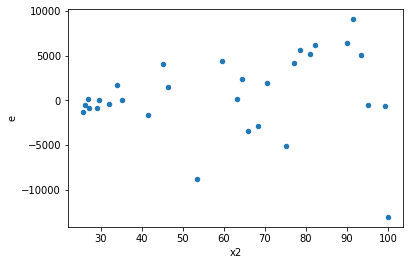

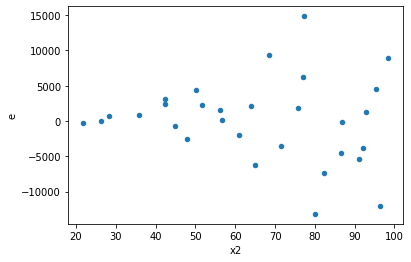

In [12]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
2.0,8.0,16.0,30014695.693215333,1075626869.0206215,4287813.670459333,71708457.9347081,17.918337070859618,0.0003075112884869391,0.9998462443557565,Reject005=0 : Heteroscedasticity
3.0,11.0,13.0,68109727.8792738,405863153.303173,6810972.78792738,33821929.441931084,5.042197038113751,0.011031960550325959,0.994484019724837,Reject005=0 : Heteroscedasticity
7.0,12.0,12.0,104797300.27351524,537032113.2947863,9527027.297592295,48821101.20861694,5.124484236646954,0.008285691307189147,0.9958571543464054,Reject005=0 : Heteroscedasticity
10.0,10.0,14.0,220300036.841596,323067796.7610821,24477781.871288445,24851368.9816217,1.04749284330864,0.9644332846376953,0.5177833576811524,Reject005=1 : Homoscedasticity
12.0,7.0,17.0,55619672.30119949,290763561.2489323,9269945.383533249,18172722.57805827,2.1525867975383615,0.30650622822100804,0.846746885889496,Reject005=1 : Homoscedasticity
13.0,13.0,11.0,30686180.666462325,609529453.2502543,2557181.7222051937,60952945.325025424,23.474833770764356,1.7881475447012463e-06,0.9999991059262276,Reject005=0 : Heteroscedasticity
15.0,10.0,14.0,28617843.399423067,591868769.454079,3179760.377713674,45528366.881083004,14.772720671238156,0.0001525343496653342,0.9999237328251673,Reject005=0 : Heteroscedasticity
18.0,11.0,13.0,157499601.68530905,463191247.78285074,15749960.168530906,38599270.648570895,2.488457441304222,0.13832716467010564,0.9308364176649472,Reject005=1 : Homoscedasticity
19.0,7.0,17.0,95304414.73756695,274474244.5238545,15884069.122927824,17154640.282740906,1.185871681598989,0.8650306523586191,0.5674846738206905,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,14.0,327431308.84369475,92668590.37108748,36381256.53818831,7128353.105468268,0.20215492067272148,0.007153100746606631,Reject005=0 : Heteroscedasticity
1.0,12.0,12.0,405346764.3708185,116098217.85709216,36849705.85189259,10554383.441553833,0.28641703366573174,0.03951664771105773,Reject005=0 : Heteroscedasticity
2.0,8.0,16.0,30014695.693215333,1075626869.0206215,4287813.670459333,71708457.9347081,17.918337070859618,0.0003075112884869391,Reject005=0 : Heteroscedasticity
3.0,11.0,13.0,68109727.8792738,405863153.303173,6810972.78792738,33821929.441931084,5.042197038113751,0.011031960550325959,Reject005=0 : Heteroscedasticity
4.0,11.0,13.0,1070295907.8425965,337242677.3417678,107029590.78425965,28103556.445147317,0.2666170975979512,0.026752047787554932,Reject005=0 : Heteroscedasticity
5.0,16.0,8.0,878927593.4405546,49193148.99808042,58595172.896036975,7027592.7140114885,0.11193902516022794,0.0038528539218983435,Reject005=0 : Heteroscedasticity
6.0,10.0,14.0,733668836.2014004,38961637.31774466,81518759.57793337,2997049.024441897,0.03793229256586088,4.569793634758915e-07,Reject005=0 : Heteroscedasticity
7.0,12.0,12.0,104797300.27351524,537032113.2947863,9527027.297592295,48821101.20861694,5.124484236646954,0.008285691307189147,Reject005=0 : Heteroscedasticity
8.0,13.0,11.0,351015146.7759845,109183992.58869542,29251262.231332045,10918399.258869542,0.3676070072473867,0.10490669758943197,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    553
Reject005=1 : Homoscedasticity      447
Name: Result_test, dtype: int64